# A preliminary analysis of the Nobel Laureates

### Introduction

The Nobel Prizes are five separate prizes that, according to Alfred Nobel's will of 1895, are awarded to "those who, during the preceding year, have conferred the greatest benefit to Mankind." Alfred Nobel was a Swedish chemist, engineer, and industrialist most famously known for the invention of dynamite. He died in 1896. In his will, he bequeathed all of his "remaining realisable assets" to be used to establish five prizes which became known as "Nobel Prizes." Nobel Prizes were first awarded in 1901.

Nobel Prizes are awarded in the fields of Physics, Chemistry, Physiology or Medicine, Literature, and Peace (Nobel characterized the Peace Prize as "to the person who has done the most or best to advance fellowship among nations, the abolition or reduction of standing armies, and the establishment and promotion of peace congresses"). In 1968, Sveriges Riksbank (Sweden's central bank) funded the establishment of the Prize in Economic Sciences in Memory of Alfred Nobel, to also be administered by the Nobel Foundation. Nobel Prizes are widely regarded as the most prestigious awards available in their respective fields.

The Nobel Prizes, beginning in 1901, and the Nobel Memorial Prize in Economic Sciences, beginning in 1969.

# Set Up


### Import Statements

In [1]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=b3c313e19c7ed707db3eab2014b15deef1a392c0303d834dccd5e2e1c7d009b7
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pycountry

from random import randint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

#random color
color = []
for i in range(50):
    color.append('#%06X' % randint(0, 0xFFFFFF))

### Load the Data

In [4]:
df_data = pd.read_csv('/content/Onyx Data - DataDNA Dataset Challenge - April 2022 - Nobel Prize Winners.csv' , encoding="windows-1252")

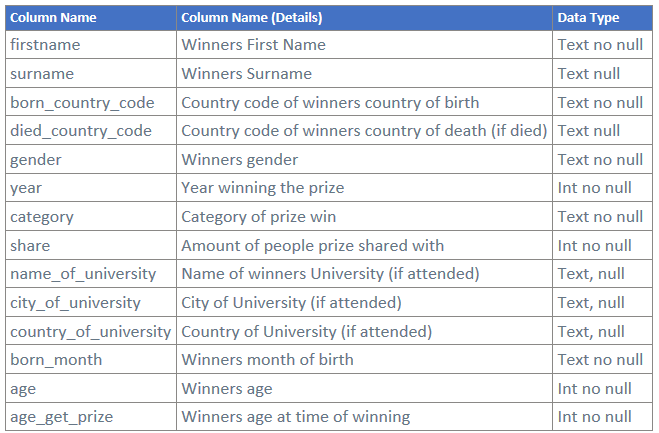

In [5]:
year_frame = pd.read_csv('/content/year.csv' , encoding="windows-1252")
year_frame.columns = ['year']

# Data Exploration & Cleaning

## **Preliminary data exploration.**

* What is the shape of df_data? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
#What is the shape of df_data? How many rows and columns?
df_data.shape

(923, 14)

In [7]:
#What are the column names?
df_data.columns

Index(['firstname', 'surname', 'born_country_code', 'died_country_code',
       'gender', 'year', 'category', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'born_month', 'age',
       'age_get_prize'],
      dtype='object')

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   firstname              923 non-null    object
 1   surname                921 non-null    object
 2   born_country_code      923 non-null    object
 3   died_country_code      617 non-null    object
 4   gender                 923 non-null    object
 5   year                   923 non-null    int64 
 6   category               923 non-null    object
 7   share                  923 non-null    int64 
 8   name_of_university     697 non-null    object
 9   city_of_university     692 non-null    object
 10  country_of_university  693 non-null    object
 11  born_month             923 non-null    object
 12  age                    923 non-null    int64 
 13  age_get_prize          923 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.1+ KB


### Check for Duplicates

In [9]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


### Check for NaN Values

In [10]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')
print(df_data.isna().sum())

Any NaN values among the data? True
firstname                  0
surname                    2
born_country_code          0
died_country_code        306
gender                     0
year                       0
category                   0
share                      0
name_of_university       226
city_of_university       231
country_of_university    230
born_month                 0
age                        0
age_get_prize              0
dtype: int64


In [11]:
df_data.head(5)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,RÃ¶ntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,Ã‰cole Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,Ã‰cole municipale de physique et de chimie ind...,Paris,France,May,47,44


# Analysis

## Find the Repeat Winners

In [12]:
df_data['surname'].fillna('', inplace=True)

In [13]:
df_data['full_name'] =  df_data['surname']  + ', ' +   df_data['firstname']  

In [14]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners_list = list(set(multiple_winners['full_name']))
print(f'There are {multiple_winners.full_name.nunique()}' \
      f' winners who weere awarded the prize more than once. and they are {multiple_winners_list}'  )

There are 4 winners who weere awarded the prize more than once. and they are ['Bardeen, John', 'Curie, Marie', 'Pauling, Linus', 'Sanger, Frederick']


# Youngest and Oldest Nobel Laureates

In [44]:
#Youngest and Oldest Nobel Laureates
print(df_data[['full_name','age_get_prize','category', 'year']].sort_values(['age_get_prize'], ascending=True).head(1))
print(df_data[['full_name','age_get_prize','category','year']].sort_values(['age_get_prize'], ascending=True).tail(1))

             full_name  age_get_prize category  year
862  Yousafzai, Malala             17    peace  2014
            full_name  age_get_prize   category  year
914  Goodenough, John             97  chemistry  2019


## Year by year Analysis 

In [15]:
year_graph_ = df_data.groupby(['year'])['share'].count() \
                .rename_axis(['year']).reset_index(name='counts')

In [16]:
year_merged_df = pd.merge(year_frame, year_graph_ , on='year', how='outer')

In [17]:
line = px.line(year_merged_df, 
               x='year', 
               y='counts',
               title='Total Nobel Prizes award by Category',
               )
line.update_yaxes(
        title_text = "Total Nobel Prizes award",
        title_standoff = 25,
        zeroline=True, 
        range=[0, 20]
        )

# line.update_traces(connectgaps=True)
line.update_traces(line_color=color[30], line_width=5)

line.show()

In [18]:
#Award by year and Category
cat_year_graph_ = df_data.groupby(['category','year'])['share'].count()\
                    .rename_axis(['category','year'])\
                    .reset_index(name='counts')

In [19]:
bar = px.bar(cat_year_graph_, 
               x='year', 
               y='counts',
               color='category',
              #  color_discrete_map={
              #     'female': '#d93551',
              #     'male': '#17287a'
              #     }, 
               title='Total Nobel Prizes award by Category',
               )
a = 0
b = cat_year_graph_.groupby(['year']).sum().max() * 1.5

bar.update_yaxes(
        title_text = "Total Nobel Prizes award",
        title_standoff = 25,
        zeroline=True, 
        range=[a, b]
        )


bar.show()

In [20]:
#Award by year and Category
gender_year_graph_ = df_data.groupby(['gender','year'])['share'].count()\
                    .rename_axis(['gender','year'])\
                    .reset_index(name='counts')

In [21]:
bar = px.bar(gender_year_graph_, 
               x='year', 
               y='counts',
               color='gender',
               color_discrete_map={
                  'female': '#d93551',
                  'male': '#17287a'
                  }, 
               title='Total Nobel Prizes award by gender',
               )
a = 0
b = cat_year_graph_.groupby(['year']).sum().max() * 1.5

bar.update_yaxes(
        title_text = "Total Nobel Prizes award",
        title_standoff = 25,
        zeroline=True, 
        range=[a, b]
        )


bar.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



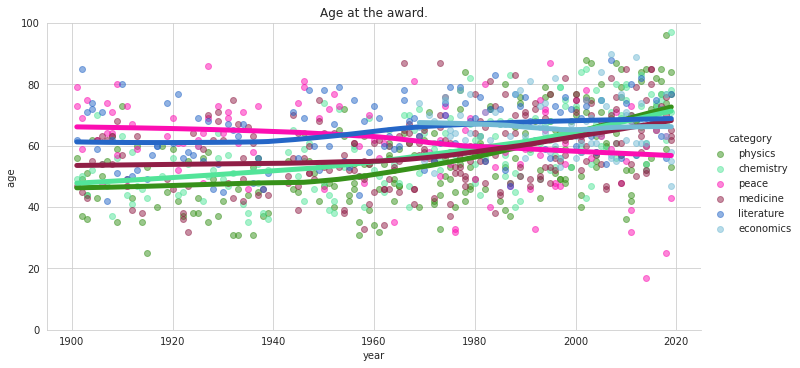

In [22]:
sns.set_palette(color) #https://s3.amazonaws.com/assets.datacamp.com/production/course_15192/slides/chapter4.pdf
with sns.axes_style("whitegrid"):
    ax = sns.lmplot(data=df_data,
               x='year',
               y='age_get_prize',
              #  hue ='born_country_code',
               hue='category', 
              #  hue= 'gender',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5}
               )
    ax.set(ylim=(0, 100),
        # xlim=(0, 450000000),
        ylabel='age ',
        xlabel='year',
        title= 'Age at the award.'
        )


In [23]:
df_data['count_1'] = 1

In [24]:
# 'category',
fig = px.sunburst(df_data, path=['gender', 'born_country_code'], values='count_1')
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()

In [25]:
born_country_code_graph_ = df_data.groupby(['born_country_code'])['share'].count()\
                    .rename_axis(['born_country_code'])\
                    .reset_index(name='counts')

In [26]:
born_country_code_graph_= born_country_code_graph_.sort_values('counts', ascending=False)

In [27]:
born_country_code_graph_['born_country_code_alpha_3'] = born_country_code_graph_['born_country_code'] 

In [28]:
#To get the look up table for 
countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3


In [29]:
born_country_code_graph_['born_country_code_alpha_3'] = [countries.get(country, 'Unknown code') \
                                                         for country in born_country_code_graph_['born_country_code_alpha_3']]

In [30]:
world_map = px.choropleth(born_country_code_graph_,
                          locations='born_country_code_alpha_3',
                          color='counts', 
                          hover_name='born_country_code_alpha_3', 
                          color_continuous_scale=px.colors.diverging.Fall)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()